In [ ]:
!pip install umap-learn
!pip install hdbscan

     |████████████████████████████████| 86 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 36.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=5ccae1887c48e4c18fd10362e116de6aea2ea9c60cce57a50a06ddf453d45f2c
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=fcc6c9ca421f1664317bd180d8a3f5393a00b425ff248ae42d37c477cbc9cbf7
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent
     |████████████████████████████████| 6.4 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311889 sha256=ccb919f866e5c0bbc578c35bb8be

In [ ]:
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 1.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
# nltk stop words 
import nltk
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pickle 
import numpy as np
import pandas as pd 

In [ ]:
# load embedings 
with open(r"/content/um6p_papers_title_abstract.data", "rb") as input_file:
      um6p_embeds = pickle.load(input_file)

In [ ]:
# load papers meta 
um6p_meta = pd.read_excel('/content/wos_raw.xls')

In [ ]:
um6p_embeds.shape

(996, 768)

In [ ]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(um6p_embeds)

In [ ]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=20,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

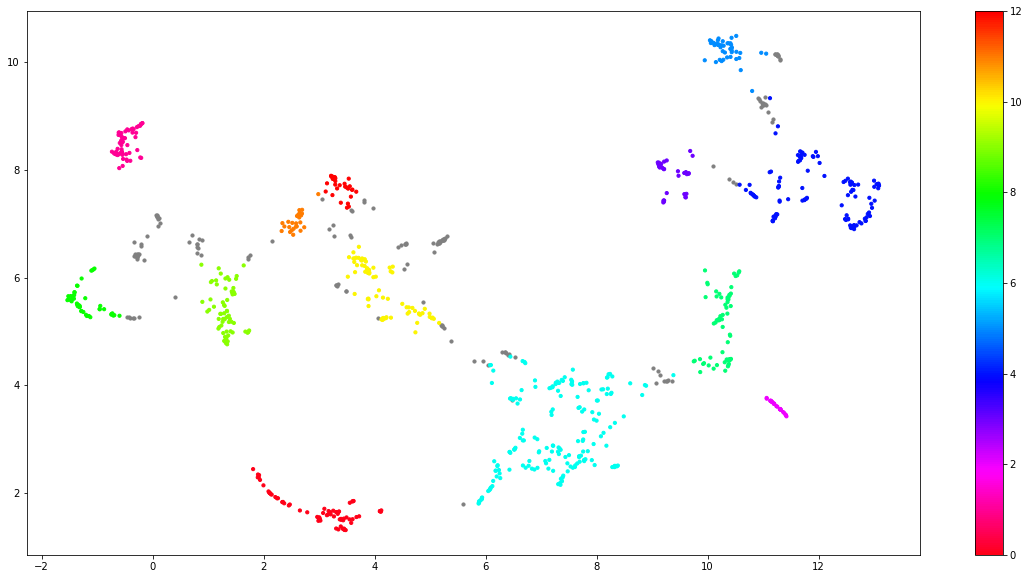

In [ ]:

import matplotlib.pyplot as plt

# Prepare data
umap_data =umap_embeddings
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_
#result['true_label'] = wos_topics_enc

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
#clustered = result.loc[result.true_label.isin([51]), :]
plt.scatter(outliers.x, outliers.y, color='gray',s=10)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, cmap='hsv_r',s=10)
plt.colorbar()

In [ ]:
import plotly.express as px
result['labels_'] = result['labels'].astype(str)
fig = px.scatter(result, x="x", y="y", color='labels_' ,width=1000, height=700)

fig.show()

In [ ]:

authors_list = []
years_list = []
titles_list=[]
for paper in um6p_meta[um6p_meta.Abstract.notna()][['Article Title','Publication Year','Authors']].values : 
   title,year,authors = paper
   authors_list.append(authors)
   years_list.append(year)
   titles_list.append(title)
 


In [ ]:
result['years'] = years_list
result['titles'] = titles_list
result['authors'] = authors_list

In [ ]:
result

,x,y,labels,labels_,years,titles,authors
0,7.369697,2.266598,6,6,2021.0,Interactive effect of potassium and cadmium on...,"Naciri, R; Lahrir, M; Benadis, C; Chtouki, M; ..."
1,12.639412,6.899190,4,4,2020.0,"Natural resources revenues, agriculture develo...","Azizi, J"
2,11.025948,9.346973,-1,-1,2020.0,"Leja, Fejer-Leja andR-Leja sequences for Richa...","Chkifa, MA"
3,1.810893,2.439535,0,0,2021.0,Potential End-Use of a Europium Binary Photolu...,"Moudam, O; Lakbita, O"
4,-1.279338,5.981740,8,8,2020.0,Emerging opportunities for 2D-black phosphorus...,"Makha, M; Ghailane, A; Larhlimi, H; Alami, J"
...,...,...,...,...,...,...,...
991,11.315867,3.544492,2,2,2021.0,Geochemical and isotopic evidence of groundwat...,"EL Mountassir, O; Bahir, M; Ouazar, D; Chehbou..."
992,5.044051,5.255172,10,10,2020.0,Humification Process and Total Petroleum Hydro...,"Aguelmous, A; El Fels, L; Souabi, S; Zamama, M..."
993,5.376645,4.828398,-1,-1,2020.0,Genotoxicity evaluation of different types of ...,"Zegzouti, Y; Aguelmous, A; Khadra, A; Boutafda..."
994,5.244921,6.705193,-1,-1,2021.0,Application of Moving Bed Biofilm Reactor and ...,"Lusinier, N; Seyssiecq, I; Sambusiti, C; Jacob..."


In [ ]:
# get index 
cluster_id = 6
cluster_papers_ids = list(result[result['labels']==cluster_id].index)
cluster_papers_titles = um6p_meta[um6p_meta.index.isin(cluster_papers_ids)]['Article Title'].values

print(cluster_papers_titles[:15])
print(' ')

# word freq 
cluster_papers_titles = [title.lower().split(' ') for title in cluster_papers_titles] 

cluster_papers_titles_tokens = [token  for title_tokens in cluster_papers_titles for token in title_tokens if token not in stops]

import collections 
freq = collections.Counter(cluster_papers_titles_tokens)
freq.most_common(15)

['Interactive effect of potassium and cadmium on growth, root morphology and chlorophyll a fluorescence in tomato plant'
 'Effect of Cadmium and Phosphorus Interaction on Tomato: Chlorophyll a Fluorescence, Plant Growth, and Cadmium Translocation'
 'Draft Genome Sequence of Biological N-2-Fixing Bacterium Rhizobium tropici A12, Isolated from Root Nodule of Tropical Soybean (Glycine max), TGx-1148 Variety'
 'Early effects of surface liming on soil P biochemistry and dynamics in extensive grassland'
 'General trends in fertilizer use in the world'
 'Impact of Mycorrhization on Phosphorus Utilization Efficiency of Acacia gummifera and Retama monosperma under Salt Stress'
 'Halotolerant Endophytic Bacterium Serratia rubidaea ED1 Enhances Phosphate Solubilization and Promotes Seed Germination'
 'Photosynthetic performance of freshwater green microalgae Chlorella vulgaris to air-drying treatment'
 'Quinoa value chain, adoption, and market assessment in Morocco'
 'Does Parmelina tiliacea lich

[('soil', 23),
 ('using', 19),
 ('morocco', 14),
 ('phosphorus', 13),
 ('water', 13),
 ('effect', 12),
 ('properties', 12),
 ('analysis', 11),
 ('based', 11),
 ('plant', 10),
 ('stress', 10),
 ('effects', 9),
 ('phosphate', 9),
 ('production', 9),
 ('acid', 9)]

In [ ]:
import plotly.express as px
result['labels_'] = result['labels'].astype(str)
fig = px.scatter(result, x="x", y="y", color='labels_' ,hover_data=['titles'],width=1000, height=700)

fig.show()